# Машины опорных векторов

In [1]:
import numpy
import pylab
import numpy.random
import sklearn.datasets
import sklearn.decomposition
import sklearn.cross_validation as cv
import sklearn.svm
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [2]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None
    consts = [0.1, 1, 10, 100]
    for kernel in ["linear"]:#, "rbf"]:#, "poly"]:        
        for c in consts:
            model = sklearn.svm.SVC(kernel=kernel, C=c)
            print "Trying model {0} with c = {1}".format(model, c)
            accuracy = numpy.mean(cv.cross_val_score(model, x, y))
            if accuracy > best_accuracy or not best_model:
                best_model = model
                best_accuracy = accuracy
                #подбирать параметры для каждого случая
    best_model.fit(x, y)
    print "Best model {}".format(best_model)
    return best_model

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [3]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    pylab.figure(figsize=(8, 8))

    colors = numpy.array(['r', 'b'])[y]
    pylab.title(description, fontsize='small')
    pylab.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = numpy.meshgrid(numpy.linspace(x1_min, x1_max, n_points), numpy.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(numpy.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    pylab.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    pylab.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Применим реализованную функцию `select_model` для нескольких синтетических и одного реального набора данных.

## Данные с линейной границей

Generating 'Linearly-separated' data set
Trying model SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) with c = 0.1
Trying model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) with c = 1
Trying model SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) with c = 10
Trying model SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=

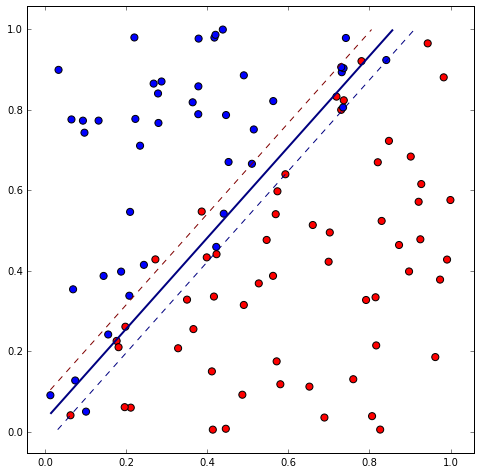

In [7]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = numpy.random.random((size, 2))
    y = numpy.zeros(size, dtype=int)
    noise = numpy.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)
pylab.show()

## Концентрические окружности

Generating 'Concentric circles' data set
Trying model SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) with c = 0.1
Trying model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) with c = 1
Trying model SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) with c = 10
Trying model SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=

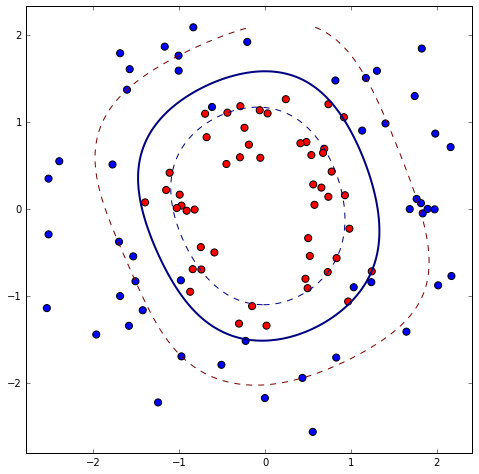

In [8]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = numpy.zeros((size, 2))
    x[:size/2, 0] = sigma * numpy.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * numpy.random.randn(size/2) + r2
    x[:, 1] = (numpy.random.random(size) - 0.5) * 2 * numpy.pi
    y = numpy.hstack([numpy.zeros(size/2, dtype=int), numpy.ones(size/2, dtype=int)])

    z = numpy.zeros((size, 2))
    z[:, 0] = x[:, 0] * numpy.cos(x[:, 1])
    z[:, 1] = x[:, 0] * numpy.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)
pylab.show()

## Смесь гауссовских распределений

Generating 'Gaussian mixture' data set
Trying model SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) with c = 0.1
Trying model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) with c = 1
Trying model SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) with c = 10
Trying model SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=Tr

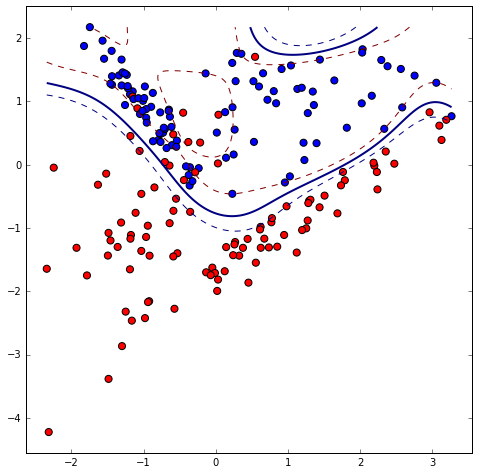

In [9]:
def generate_gauss(size=200):
    print "Generating 'Gaussian mixture' data set"

    x, y = sklearn.datasets.make_classification(n_samples=size,
                                                n_features=2,
                                                n_informative=2,
                                                n_redundant=0,
                                                n_classes=2,
                                                n_clusters_per_class=2)
    return x, y

x, y = generate_gauss()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)
pylab.show()

## Синусоидальная граница

Generating 'Sinus-separated' data set
Trying model SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) with c = 0.1
Trying model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) with c = 1
Trying model SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) with c = 10
Trying model SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=Tru

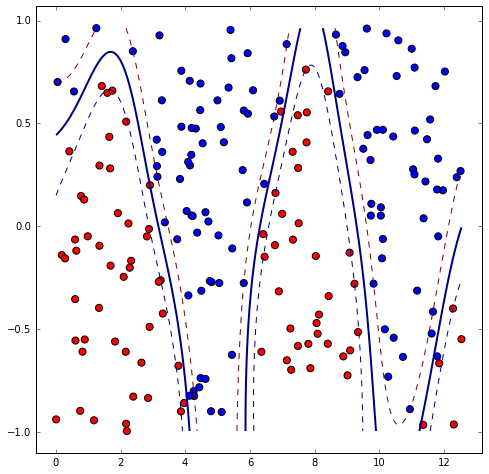

In [10]:
def generate_sin(size=200):
    print "Generating 'Sinus-separated' data set"

    x = numpy.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * numpy.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = numpy.zeros(size, dtype=int)
    y[x[:, 1] > numpy.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)
pylab.show()

## Спам
Спам (англ. spam) — рассылка коммерческой и иной рекламы или иных видов сообщений лицам, не выражавшим желания их получать.
Для анализа был взят датасет писем, составленный в Hewlett-Packard Labs. В датасете письма, выделенные как спам, были отмечены людьми. Письма, не являющиеся спамом, были взяты из личной и рабочей переписки.

Всего в датасете 58 числовых атрибутов.
57 атрибутов - различные числовые характеристики письма, например, общее количество заглавных букв в письме, максимальная длина непрерывных последовательностей заглавных букв, процентное соотношение букв ко всем символам письма, процентное соотношение слов в письме.
58 атрибут означает, было ли отмечено письмо как спам (1) или нет (0).

[Страница](http://archive.ics.uci.edu/ml/datasets/Spambase) с полным описанием датасета.


Trying model SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) with c = 0.1
Trying model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) with c = 1
Trying model SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) with c = 10
Trying model SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) with c 

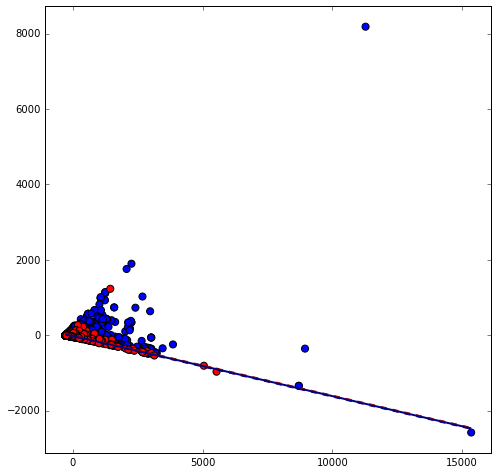

In [4]:
def load_spambase():
    TRAINING_SET_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
    
    df = pd.read_csv(TRAINING_SET_URL, sep=",", header=None)
    x = df.ix[:,:56].values
    y = df.ix[:,57].values.flatten()
    # Dimesionality reduction -> 
    pca = sklearn.decomposition.PCA(n_components=2)
    z = pca.fit_transform(x)
    return z, y

x, y = load_spambase()
sample_ind = numpy.random.choice(numpy.arange(len(y)), 100)

# Subsample the data set, because training on full data is slow
xs, ys = x[sample_ind, :20], y[sample_ind]
clf = select_model(xs, ys)
#clf = sklearn.svm.SVC(kernel='linear', C=100)
#clf.fit(x, y)

plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)
pylab.show()

In [5]:
float((clf.predict(xs) == ys).sum())/len(ys)

0.79

Предложите такой набор признаков, который дает наилучшую accuracy для этих данных при использовании SVC. Победитель получает +1 балл к ДЗ 5 (но не больше максимума).